### Deliverable 1: Preprocessing the Data for a Neural Network

In [91]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [92]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS','STATUS'], axis=1)
application_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0


In [93]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [94]:
# Look at INCOME_AMT value counts for binning
income_amt = application_df.INCOME_AMT.value_counts()
income_amt

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

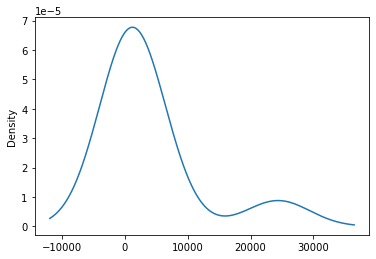

In [95]:
# Visualize the value counts of INCOME_AMT
income_amt.plot.density()

In [96]:
# Determine which values to replace if counts are less than ...?
replace_income_amt = list(income_amt[income_amt < 1000].index)

# Replace in dataframe
for inc in replace_income_amt:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(inc,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [97]:
# Look at CLASSIFICATION value counts for binning
application_type_classcount = application_df.CLASSIFICATION.value_counts()
application_type_classcount

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

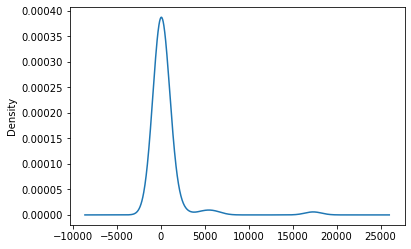

In [98]:
# Visualize the value counts of CLASSIFICATION
application_type_classcount.plot.density()

In [99]:
# Determine which values to replace if counts are less than ..?
replace_class = list(application_type_classcount[application_type_classcount < 1880].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [100]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION       6
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           4
dtype: int64

In [101]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/Tyleah1/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [102]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/Users/Tyleah1/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [103]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/Tyleah1/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [105]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 80)                3520      
                                                                 
 dense_23 (Dense)            (None, 30)                2430      
                                                                 
 dense_24 (Dense)            (None, 50)                1550      
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [107]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch",
    period=5)

In [108]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [109]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5729 - accuracy: 0.7187
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5581 - accuracy: 0.7283
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7285
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7304
Epoch 5/100
773/804 [===========================>..] - ETA: 0s - loss: 0.5535 - accuracy: 0.7280
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7290
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7304
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] -

802/804 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7386
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5393 - accuracy: 0.7386
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5392 - accuracy: 0.7383
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7372
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7381
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7381
Epoch 70/100
779/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7374
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7380
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5382 - accuracy: 0.7378
Epoch 72/100
804/804 

In [110]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5596 - accuracy: 0.7254 - 333ms/epoch - 1ms/step
Loss: 0.5596139430999756, Accuracy: 0.7253644466400146


In [111]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization2.h5")